In [1]:
import numpy as np
import pandas as pd

In [2]:
fas = pd.read_csv('C:/Users/sherryyang/Desktop/Risk/assignment9/FAS.csv')[['Date','Adj Close']]
faz = pd.read_csv('C:/Users/sherryyang/Desktop/Risk/assignment9/FAZ.csv')[['Date','Adj Close']]
uyg = pd.read_csv('C:/Users/sherryyang/Desktop/Risk/assignment9/UYG.csv')[['Date','Adj Close']]
skf = pd.read_csv('C:/Users/sherryyang/Desktop/Risk/assignment9/SKF.csv')[['Date','Adj Close']]
edc = pd.read_csv('C:/Users/sherryyang/Desktop/Risk/assignment9/EDC.csv')[['Date','Adj Close']]
edz = pd.read_csv('C:/Users/sherryyang/Desktop/Risk/assignment9/EDZ.csv')[['Date','Adj Close']]
iyf = pd.read_csv('C:/Users/sherryyang/Desktop/Risk/assignment9/IYF.csv')[['Date','Adj Close']]

In [3]:
fas = fas.set_index('Date')
faz = faz.set_index('Date')
uyg = uyg.set_index('Date')
skf = skf.set_index('Date')
edc = edc.set_index('Date')
edz = edz.set_index('Date')

In [4]:
da1 = pd.merge(fas, faz, left_index=True, right_index=True)
da1.columns = ['fas', 'faz']
da2 = pd.merge(uyg, skf, left_index=True, right_index=True)
da2.columns = ['uyg', 'skf']
da3 = pd.merge(edc, edz, left_index=True, right_index=True)
da3.columns = ['edc', 'edz']
da4 = pd.merge(da1, da2, left_index=True, right_index=True)
da5 = pd.merge(da4, da3, left_index=True, right_index=True)

In [5]:
da5['fas_daily'] = da5['fas'].pct_change(1)
da5['faz_daily'] = da5['faz'].pct_change(1)
da5['uyg_daily'] = da5['uyg'].pct_change(1)
da5['skf_daily'] = da5['skf'].pct_change(1)
da5['edc_daily'] = da5['edc'].pct_change(1)
da5['edz_daily'] = da5['edz'].pct_change(1)

In [6]:
#There is split on 2018-03-28, so i change the return to 0 to indicate no change
da5.ix[da5.index == '2018-03-28', 'edz_daily'] =0

C:\Users\sherryyang\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


In [7]:
da5['fas_cumreturn'] = np.cumprod(da5['fas_daily']+1)
da5['faz_cumreturn'] = np.cumprod(da5['faz_daily']+1)
da5['uyg_cumreturn'] = np.cumprod(da5['uyg_daily']+1)
da5['skf_cumreturn'] = np.cumprod(da5['skf_daily']+1)
da5['edc_cumreturn'] = np.cumprod(da5['edc_daily']+1)
da5['edz_cumreturn'] = np.cumprod(da5['edz_daily']+1)

In [8]:
fas_underlying = pd.read_csv('C:/Users/sherryyang/Desktop/Risk/assignment9/fas_underlying.csv')[['date','close']].iloc[::-1]
uyg_underlying = pd.read_csv('C:/Users/sherryyang/Desktop/Risk/assignment9/IYF.csv')[['Date','Adj Close']]
edc_underlying = pd.read_csv('C:/Users/sherryyang/Desktop/Risk/assignment9/EEM.csv')[['date','Adj Close']]

fas_underlying.reset_index(drop=True, inplace=True)
uyg_underlying.reset_index(drop=True, inplace=True)
edc_underlying.reset_index(drop=True, inplace=True)

df2 = pd.concat( [fas_underlying, uyg_underlying,edc_underlying], axis=1) 


In [9]:
df2.columns = ['date1', 'fas_underlying', 'date2', 'uyg_underlying', 'date3','edc_underlying']

In [10]:
df2['fas_daily'] = df2['fas_underlying'].pct_change(1)
df2['uyg_daily'] = df2['uyg_underlying'].pct_change(1)
df2['edc_daily'] = df2['edc_underlying'].pct_change(1)

In [11]:
df2['fas_cumreturn'] = np.cumprod(df2['fas_daily']+1)
df2['uyg_cumreturn'] = np.cumprod(df2['uyg_daily']+1)
df2['edc_cumreturn'] = np.cumprod(df2['edc_daily']+1)

In [12]:
#There is split on 2018-03-28, so i change the return to 0 to indicate no change
da5.ix[da5.index == '2018-03-28', 'edz_daily'] =0


In [13]:
df2= df2.dropna(axis =0, how ='any')

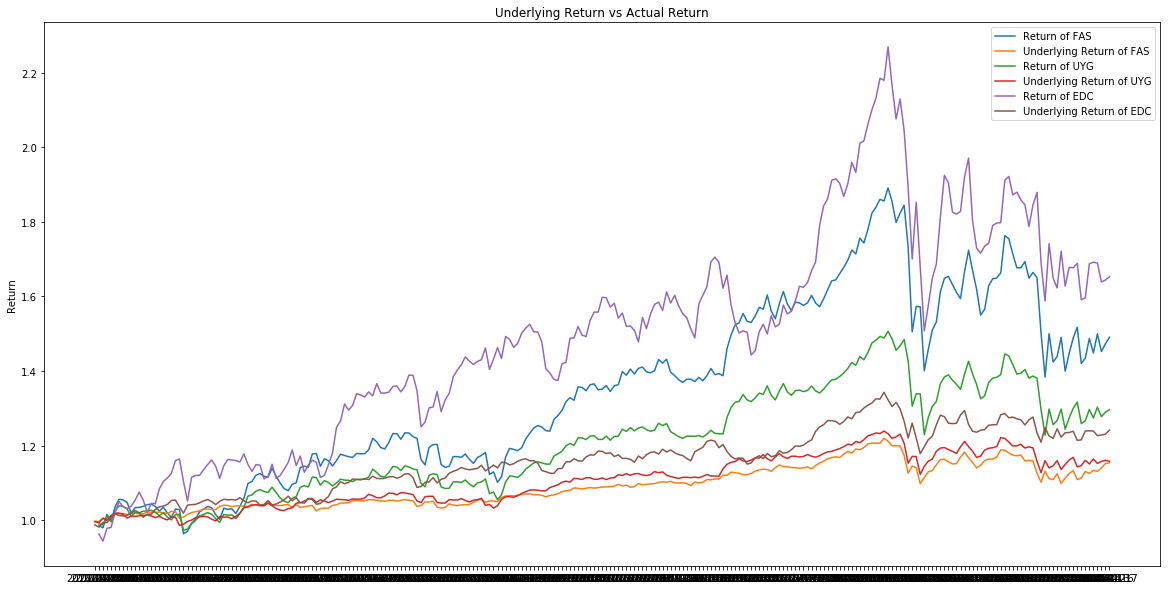

In [27]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize = (20,10))
plt.plot(da5.index, da5['fas_cumreturn'], label ='Return of FAS')
plt.plot(da5.index, df2['fas_cumreturn'], label ='Underlying Return of FAS')
plt.plot(da5.index, da5['uyg_cumreturn'], label ='Return of UYG')
plt.plot(da5.index, df2['uyg_cumreturn'], label ='Underlying Return of UYG')
plt.plot(da5.index, da5['edc_cumreturn'], label ='Return of EDC')
plt.plot(da5.index, df2['edc_cumreturn'], label ='Underlying Return of EDC')
plt.ylabel('Return')
plt.title('Underlying Return vs Actual Return')
plt.legend()
plt.show()

In [15]:
fas_fee = 2.1824
fas_rebate = -0.5024
faz_fee = 12.7218
faz_rebate = -11.0418
uyg_fee = 4.6235
uyg_rebate = -2.9435
skf_fee =9.6865
skf_rebate = -11.778
edc_fee = 6.9736
edc_rebate = -5.9236
edz_fee = 12.9827
edz_rebate = -11.3027

# Short-short without borrowing cost

In [16]:
fas_faz_pair = -(da5['fas_cumreturn']-1) - (da5['faz_cumreturn']-1)
uyg_skf_pair = -(da5['uyg_cumreturn']-1) - (da5['skf_cumreturn']-1)
edc_edz_pair = -(da5['edc_cumreturn']-1) - (da5['edz_cumreturn']-1)


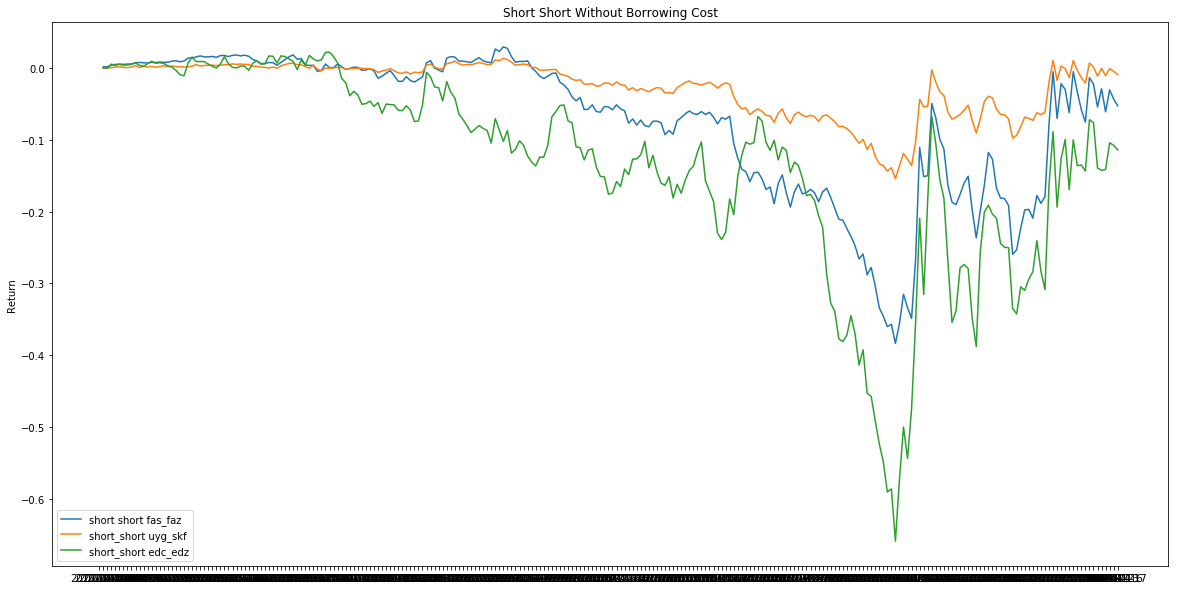

In [17]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize = (20,10))
plt.plot(da5.index, fas_faz_pair , label ='short short fas_faz')
plt.plot(da5.index, uyg_skf_pair , label ='short_short uyg_skf')
plt.plot(da5.index, edc_edz_pair , label ='short_short edc_edz')
plt.ylabel('Return')
plt.title('Short Short Without Borrowing Cost')
plt.legend()
plt.show()

# Short short with borrowing cost

In [18]:
fas_faz_pair = -(da5['fas_cumreturn']-1) - (da5['faz_cumreturn']-1) 
uyg_skf_pair = -(da5['uyg_cumreturn']-1) - (da5['skf_cumreturn']-1)
edc_edz_pair = -(da5['edc_cumreturn']-1) - (da5['edz_cumreturn']-1)

In [19]:
fas_faz_cost = fas_rebate-fas_fee+faz_rebate -faz_fee
uyg_skf_cost = uyg_rebate-uyg_fee+skf_rebate -skf_fee
edc_edz_cost = edc_rebate-edc_fee+edz_rebate -edz_fee

In [20]:
fas_faz_ = np.zeros(len(fas_faz_pair))
uyg_skf_ = np.zeros(len(uyg_skf_pair))
edc_edz_ = np.zeros(len(edc_edz_pair))
for i in range(len(edc_edz_pair)):
    fas_faz_[i] = fas_faz_pair[i] +fas_faz_cost*(i+1)*0.01/252
    uyg_skf_[i] = uyg_skf_pair[i] +uyg_skf_cost*(i+1)*0.01/252
    edc_edz_[i] = edc_edz_pair[i] +edc_edz_cost*(i+1)*0.01/252
    
    

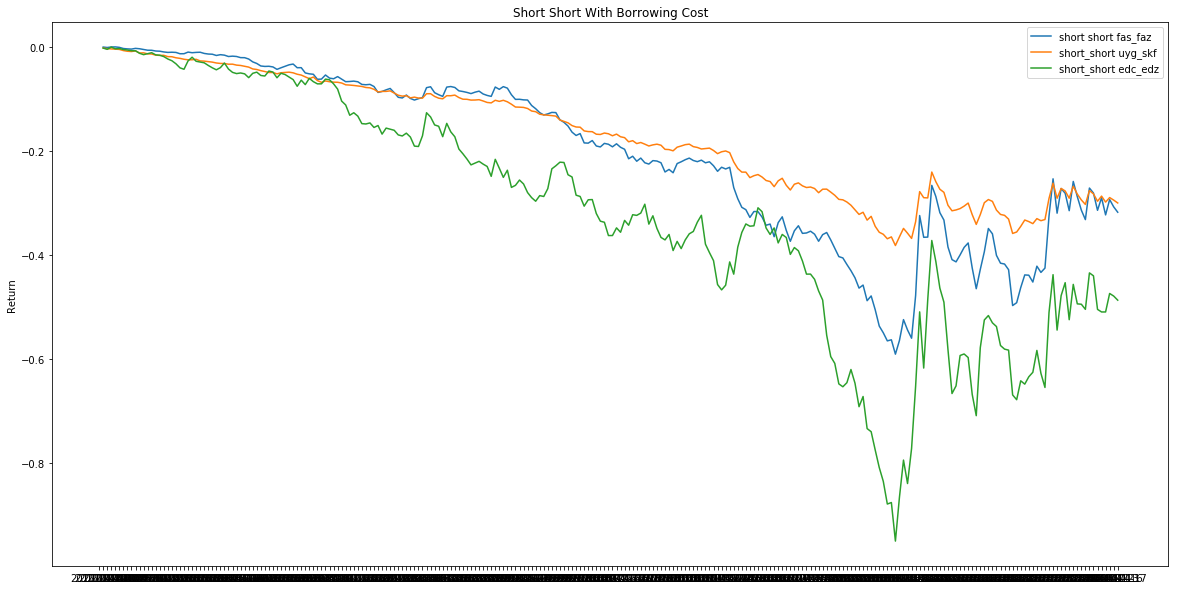

In [21]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize = (20,10))
plt.plot(da5.index, fas_faz_ , label ='short short fas_faz')
plt.plot(da5.index, uyg_skf_ , label ='short_short uyg_skf')
plt.plot(da5.index, edc_edz_ , label ='short_short edc_edz')
plt.ylabel('Return')
plt.title('Short Short With Borrowing Cost')
plt.legend()
plt.show()

In [22]:
beta1 = 3
beta2 = -3
beta3 = 2
beta4 = -2

# Modeling Leveraged EFT With Borrowing Cost

In [23]:
fas_std = np.zeros(len(df2))

uyg_std = np.zeros(len(df2))

edc_std = np.zeros(len(df2))

for i in range(len(df2)):
    fas_std[i] = np.std(df2['fas_daily'][:i]) 
    uyg_std[i] = np.std(df2['uyg_daily'][:i])
    edc_std[i] = np.std(df2['edc_daily'][:i]) 
    

In [24]:
import math
fas_deltal = np.zeros(len(da5))
faz_deltal = np.zeros(len(da5))
uyg_deltal = np.zeros(len(da5))
skf_deltal = np.zeros(len(da5))
edc_deltal = np.zeros(len(da5))
edz_deltal = np.zeros(len(da5))
for i in range(1,len(df2)):
    fas_deltal[i] = ((df2['fas_underlying'][i]/df2['fas_underlying'][1])**beta1)*math.exp(1/2*(beta1- beta1**2)*(fas_std[i]**2)*(i+1)/252+ fas_rebate*(1-beta1)*(i+1)/252*0.01-  fas_fee*(i+1)/252*0.01)
    faz_deltal[i] = ((df2['fas_underlying'][i]/df2['fas_underlying'][1])**beta2)*math.exp(1/2*(beta2- beta2**2)*(fas_std[i]**2)*(i+1)/252+ faz_rebate*(1-beta2)*(i+1)/252*0.01-  faz_fee*(i+1)/252*0.01)
    uyg_deltal[i] = ((df2['uyg_underlying'][i]/df2['uyg_underlying'][1])**beta3)*math.exp(1/2*(beta3- beta3**2)*(uyg_std[i]**2)*(i+1)/252+ uyg_rebate*(1-beta1)*(i+1)/252*0.01-  uyg_fee*(i+1)/252*0.01)
    skf_deltal[i] = ((df2['uyg_underlying'][i]/df2['uyg_underlying'][1])**beta4)*math.exp(1/2*(beta4- beta4**2)*(uyg_std[i]**2)*(i+1)/252+ skf_rebate*(1-beta2)*(i+1)/252*0.01-  skf_fee*(i+1)/252*0.01)
    edc_deltal[i] = ((df2['edc_underlying'][i]/df2['edc_underlying'][1])**beta1)*math.exp(1/2*(beta1- beta1**2)*(edc_std[i]**2)*(i+1)/252+ edc_rebate*(1-beta1)*(i+1)/252*0.01-  edc_fee*(i+1)/252*0.01)
    edz_deltal[i] = ((df2['edc_underlying'][i]/df2['edc_underlying'][1])**beta2)*math.exp(1/2*(beta2- beta2**2)*(edc_std[i]**2)*(i+1)/252+ edz_rebate*(1-beta1)*(i+1)/252*0.01-  edz_fee*(i+1)/252*0.01)
    


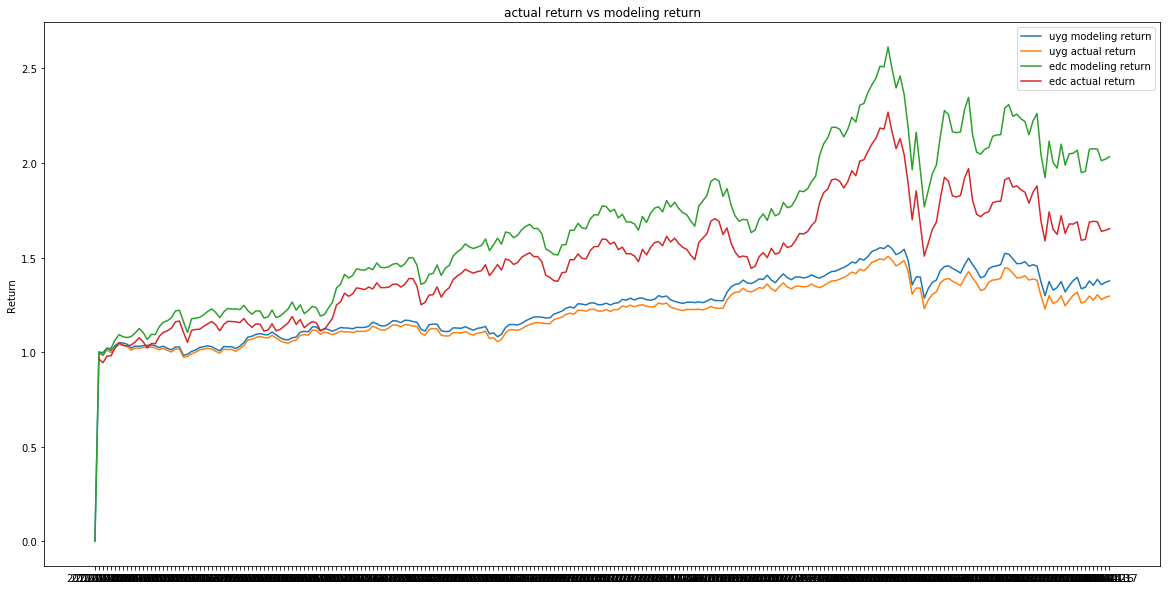

In [25]:
from matplotlib import pyplot as plt
fig, ax = plt.subplots(figsize = (20,10))
# plt.plot(da5.index, fas_deltal, label ='fas modeling return')
# plt.plot(da5.index, da5['fas_cumreturn'], label ='fas actual return')

# plt.plot(da5.index, faz_deltal, label ='faz modeling return')
# plt.plot(da5.index, da5['faz_cumreturn'], label ='faz actual return')

plt.plot(da5.index, uyg_deltal, label ='uyg modeling return')
plt.plot(da5.index, da5['uyg_cumreturn'], label ='uyg actual return')

# plt.plot(da5.index, skf_deltal, label ='skf modeling return')
# plt.plot(da5.index, da5['skf_cumreturn'], label ='skf actual return')

plt.plot(da5.index, edc_deltal, label ='edc modeling return')
plt.plot(da5.index, da5['edc_cumreturn'], label ='edc actual return')

# plt.plot(da5.index, edz_deltal, label ='edz modeling return')
# plt.plot(da5.index, da5['edz_cumreturn'], label ='edz actual return')
plt.ylabel('Return')
plt.title('actual return vs modeling return')
plt.legend()
plt.show()

# first 20 days tracking errors

In [26]:
da5['edc_cumreturn'][1:20] - edc_deltal[1:20] 

Date
2017-04-18   -0.037563
2017-04-19   -0.038344
2017-04-20   -0.040942
2017-04-21   -0.039261
2017-04-24   -0.043016
2017-04-25   -0.042519
2017-04-26   -0.045039
2017-04-27   -0.045366
2017-04-28   -0.044253
2017-05-01   -0.046965
2017-05-02   -0.049513
2017-05-03   -0.048896
2017-05-04   -0.045193
2017-05-05   -0.048355
2017-05-08   -0.048556
2017-05-09   -0.051186
2017-05-10   -0.054024
2017-05-11   -0.053042
2017-05-12   -0.054664
Name: edc_cumreturn, dtype: float64